In [2]:
from matplotlib import pyplot as plt
import numpy as np
import h5py

$Q = 4pi/\lambda\,sin(\theta)$, where $2\theta$ scattering angle

In [3]:
def d_to_twotheta(d):
    """ calculate scattering angle """
    twotheta = np.arctan(d / sdd) # radiant
    return twotheta

def twotheta_to_q(twotheta):
    """ calculate momentum transfer q from the scattering angle """
    q = 4*np.pi / wavelength * np.sin(twotheta/2)*1e1 # in nm-1
    return q

In [4]:
# constants
h = 4.135667516*1e-18 # kev*sec
c = 3*1e8 # m/s

# setup
sdd = 4.3 # sample-detector distance in meters
energy = 9.5 # energy of the x-rays in keV
wavelength = h*c/energy*1e10 # wavelength of the x-rays (A-1)
beamstop_radius = 1.5e-3 # meter

# epix params
pixel_size = 50e-6 # meter
npixel = (704, 768)
center = (int(npixel[0]/2), int(npixel[0]/2))

In [4]:
twotheta_min = d_to_twotheta(beamstop_radius + 2*pixel_size)
twotheta_max = d_to_twotheta(np.sqrt(center[0]**2 + center[1]**2) * pixel_size)

qmin = twotheta_to_q(twotheta_min)
qmax = twotheta_to_q(twotheta_max)


print(f"The q range is: {qmin:.3f} - {qmax:.3f} 1/nm") 

The q range is: 0.018 - 0.278 1/nm


# figure things out

In [11]:
photons_i = np.random.normal(1, .5, 100)
photons_j = np.random.normal(1.2, .6, 100)

In [12]:
phot_img, _,_ = np.histogram2d(photons_j+0.5, photons_i+0.5)#, bins=[np.arange(nx+1),np.arange(ny+1)])                         

In [16]:
np.shape(phot_img)

(10, 10)

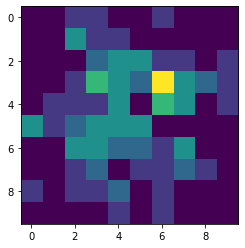

In [17]:
plt.imshow(phot_img)

# h5 files

In [5]:
def visit_func_original(name, node):
    """Return all groups and datasets name and shapes of h5 file called name
    Use it as in the following:
    with h5py.File(filename, 'a') as f: f.visititems(visit_func)
    """
    if isinstance(node, h5py.Group):
        print("group", node.name)
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')
        
        
def visit_func(name, node):
    """Return all groups and datasets name and shapes of h5 file called name
    Use it as in the following:
    with h5py.File(filename, 'a') as f: f.visititems(visit_func)
    """
    if isinstance(node, h5py.Group):
        print("group", node.name)
    elif isinstance(node, h5py.Dataset):
#         if (node.dtype == 'object') :
#             print (node.name, 'is an object Dataset')
#         else:
        print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

In [6]:
!ls ../../../hdf5/smalldata

cube			xppl1001021_Run0005.h5	xppl1001021_Run0012.h5
xppl1001021_Run0002.h5	xppl1001021_Run0009.h5	xppl1001021_Run0014.h5
xppl1001021_Run0003.h5	xppl1001021_Run0010.h5
xppl1001021_Run0004.h5	xppl1001021_Run0011.h5


## first test data

In [16]:
!pwd

/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/LCLS_L10010/notebooks


In [22]:
datadir = '/sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata/'

In [89]:
run_num = 49
filename = datadir + f'xppl1001021_Run{run_num:04d}.h5'

with h5py.File(filename, 'r') as f:
    # f.visititems(visit_func_original)
    keys = list(f['/epicsAll'].keys())
    f['/epicsAll'].visititems(visit_func_original)
    # print(f['/epicsAll'].keys())
    test = f['/epicsAll/sd_delay'][:]
#     print("\n", np.shape(test), test)
test

	 /epicsAll/RTDSL0_MPA_01 (5103,)
	 /epicsAll/RTDSL0_MPA_02 (5103,)
	 /epicsAll/RTDSL0_MPA_03 (5103,)
	 /epicsAll/at1l0_SolidAttenuator_1_1500pm_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_2_13um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_3_62um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_4_60um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_5_129um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_6_245um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_7_500um_diam (5103,)
	 /epicsAll/at1l0_SolidAttenuator_8_190um_sapph (5103,)
	 /epicsAll/at1l0_SolidAttenuator_9_380um_sapph (5103,)
	 /epicsAll/at2l0_SolidAttenuator_01_C_10um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_02_C_20um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_03_C_40um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_04_C_80um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_05_C_160um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_06_C_320um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_07_C_640um (5103,)
	 /epicsAll/at2l0_SolidAttenuator_08

array([7.271615, 7.271615, 7.271615, ..., 7.27159 , 7.27159 , 7.27159 ])

In [90]:
delays = np.mean(0.939 * (test - 6.96))
print(delays)

0.29260979716931274


In [ ]:
for key in keys:
    if 'delay' in key:
        print(key)

las_delay1
las_delay2
las_tt_delay
sd_delay


In [76]:
np.shape(test)
# delay = np.array(f['/epicsAll/sd_delay'])

ValueError: Invalid dataset identifier (invalid dataset identifier)

## Matthias' experiment test data

In [3]:
testdatadir = '/sdf/home/m/mbin/xpp-23-xsvs/results/mb/shared/'

In [4]:
runn = 380
file = f'xpplx9221_Run{runn:04d}.h5'
file

'xpplx9221_Run0380.h5'

In [6]:
with h5py.File(testdatadir + file, 'r') as f:
    f.visititems(visit_func)

group /Sums
	 /Sums/epix_alc1_calib (704, 768)
	 /Sums/epix_alc1_calib_dropped (704, 768)
	 /Sums/epix_alc1_calib_dropped_square (704, 768)
	 /Sums/epix_alc2_calib (704, 768)
	 /Sums/epix_alc2_calib_dropped (704, 768)
	 /Sums/epix_alc2_calib_dropped_square (704, 768)
	 /Sums/epix_alc3_calib (704, 768)
	 /Sums/epix_alc3_calib_dropped (704, 768)
	 /Sums/epix_alc3_calib_dropped_square (704, 768)
	 /Sums/epix_alc4_calib (704, 768)
	 /Sums/epix_alc4_calib_dropped (704, 768)
	 /Sums/epix_alc4_calib_dropped_square (704, 768)
group /UserDataCfg
group /UserDataCfg/EOrbits
	 /UserDataCfg/EOrbits/detname (1,)
	 /UserDataCfg/EOrbits/name (1,)
group /UserDataCfg/adc
	 /UserDataCfg/adc/detname (1,)
	 /UserDataCfg/adc/name (1,)
group /UserDataCfg/ai
	 /UserDataCfg/ai/detname (1,)
	 /UserDataCfg/ai/name (1,)
group /UserDataCfg/damage
	 /UserDataCfg/damage/detAlias (18,)
	 /UserDataCfg/damage/detNames (18,)
	 /UserDataCfg/damage/name (1,)
group /UserDataCfg/diode2
	 /UserDataCfg/diode2/detname (1,)
	 /

In [18]:
with h5py.File(testdatadir + file, 'r') as f:
    epix1 = np.array(f['/Sums/epix_alc1_calib'])
    epix2 = np.array(f['/Sums/epix_alc2_calib'])
    epix3 = np.array(f['/Sums/epix_alc3_calib'])
    epix4 = np.array(f['/Sums/epix_alc4_calib'])
    delayStageLocation = np.array(f['/epicsAll/sd_delay'])
    mask = f['UserDataCfg/epix_alc1/mask'][()]
    

In [23]:
mask.shape[1]/2

384.0

In [15]:
print(np.shape(epix1))
print(np.shape(epix2))
print(np.shape(epix3))
print(np.shape(epix4))
print(np.shape(delayStageLocation), delayStageLocation)

(704, 768)
(704, 768)
(704, 768)
(704, 768)
(7003,) [14.00001  14.00001  14.00001  ... 14.000005 14.000005 14.000005]


The last line gives you the array containing the location of the delay stage
To convert delayStageLocation to delay time

$delay time (ps) = 0.939 * (delayStageLocation - 6.96) $

In [12]:
delay_time = 0.939 * (delayStageLocation - 6.96)
print(delay_time) # ps

[6.61056939 6.61056939 6.61056939 ... 6.6105647  6.6105647  6.6105647 ]


# Create roi for saxs epix

In [ ]:
npixel = (704, 768)
center = (int(npixel[0]/2), int(npixel[0]/2))

In [12]:
def ring(radius=30, thickness=5, nx=704, ny=768, center_x=None, center_y=None):
    '''
    Masking the beam blocker
    nx,ny =  2d pattern dimensions
    center_x, center_y = center of the beam blocker
    radius = radius of the beam blocker
    radius2 = radius of the externa circle (to avoid dip in the angular average)
    '''
    mask = np.zeros((nx,ny),dtype=bool)
    if center_x==None:
        center_x = int(nx/2)
        center_y = int(ny/2)
        
    x,y = np.mgrid[:nx,:ny]
    x -= center_x
    y -= center_y
    rho = np.sqrt(x**2 + y**2)
    condition = (rho<radius) & (rho>radius-thickness)
    mask[condition] = 1
    
    return mask

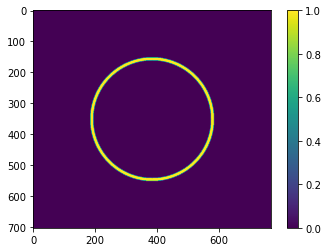

In [52]:
roi = ring(radius=200, thickness=10)
plt.imshow(roi, vmin=0, vmax=1)
plt.colorbar()
# np.save("/sdf/home/m/mbin/xpp-23-xsvs/results/shared/roi", roi)

# get img from epix5

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import h5py as h5
import sys
import time

# Parse Arguement
run_num = 38 #int(sys.argv[1])
epix = 5

In [48]:
!ls /sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata/

cube			xppl1001021_Run0031.h5	xppl1001021_Run0045.h5
jungfrau		xppl1001021_Run0032.h5	xppl1001021_Run0046.h5
xppl1001021_Run0002.h5	xppl1001021_Run0033.h5	xppl1001021_Run0047.h5
xppl1001021_Run0003.h5	xppl1001021_Run0034.h5	xppl1001021_Run0048.h5
xppl1001021_Run0004.h5	xppl1001021_Run0035.h5	xppl1001021_Run0049.h5
xppl1001021_Run0005.h5	xppl1001021_Run0036.h5	xppl1001021_Run0050.h5
xppl1001021_Run0009.h5	xppl1001021_Run0037.h5	xppl1001021_Run0051.h5
xppl1001021_Run0010.h5	xppl1001021_Run0038.h5	xppl1001021_Run0052.h5
xppl1001021_Run0011.h5	xppl1001021_Run0039.h5	xppl1001021_Run0053.h5
xppl1001021_Run0012.h5	xppl1001021_Run0040.h5	xppl1001021_Run0054.h5
xppl1001021_Run0014.h5	xppl1001021_Run0041.h5	xppl1001021_Run0055.h5
xppl1001021_Run0015.h5	xppl1001021_Run0042.h5	xppl1001021_Run0056.h5
xppl1001021_Run0024.h5	xppl1001021_Run0043.h5	xppl1001021_Run0057.h5
xppl1001021_Run0029.h5	xppl1001021_Run0044.h5


In [49]:
# Define parameters -- update!
exp_name = 'xppl1001021'
output_path = '/sdf/data/lcls/ds/xpp/{}/results/output/'.format(exp_name)
smalldata_path = '/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/'.format(exp_name)

# Define functions
def reconstruct_img(photons_i, photons_j, shape):
    nx, ny = shape
    phot_img, _,_ = np.histogram2d(photons_j+0.5, photons_i+0.5, bins=[np.arange(nx+1),np.arange(ny+1)])                         
    return phot_img

In [50]:
# Load the result from droplet analysis
with h5.File(smalldata_path + '{}_Run{:04d}.h5'.format(exp_name, run_num),'r') as f:
    mask = f['UserDataCfg/epix_alc{}/mask'.format(epix)][()]#this is the general mask we use for photonization    
    photons_j = f['epix_alc{}/ragged_droplet_photon_j'.format(epix)][()]
    photons_i = f['epix_alc{}/ragged_droplet_photon_i'.format(epix)][()]
    i_sample = f['lombpm']['channels'][:,1]
    cc = np.array(f['ai/ch03'])
    vcc = np.array(f['ai/ch02'])
    
# Load all the masks
mask = mask.astype(bool)
user_mask = np.ones_like(mask)
bad_pixel_mask = np.ones_like(mask)
# user_mask = np.load('/sdf/data/lcls/ds/xpp/xpplx9221/results/kyounes/mask/standard_mask.npy')
# user_mask = user_mask.astype(bool)
# bad_pixel_mask = np.load('/sdf/data/lcls/ds/xpp/xpplx9221/results/haoyuan/mask_epix{}_combined_hy_v1.npy'.format(epix))

total_mask = (mask * user_mask * bad_pixel_mask).astype(bool)

# Process each pattern in this run
shape = mask.shape
nframe = int(len(photons_i))
#imgs_reconstruct = np.zeros(np.r_[nframe, shape])
    
roi = np.load('/sdf/data/lcls/ds/xpp/xppl1001021/results/shared/roi.npy')    
    
roi_with_mask = roi * total_mask
pixel_num = float(np.sum(roi_with_mask))

# Create holders for the result
kbar = np.zeros(nframe)
beta = np.zeros(nframe)

# Get the total photon count and probability per shot for all runs and patterns
tic = time.time()

for i in range(nframe):
    imgs_reconstruct = reconstruct_img(photons_i[i], photons_j[i], shape)
    # imgs_reconstruct2 += reconstruct_img(photons_i[i], photons_j[i], shape)
    kbar[i] = np.sum(imgs_reconstruct[roi_with_mask])/ pixel_num
    beta[i] = np.var(imgs_reconstruct[roi_with_mask].flatten())/np.sqrt(kbar[i])

/tmp/ipykernel_3479016/3829622743.py:41: RuntimeWarning: invalid value encountered in double_scalars
  beta[i] = np.var(imgs_reconstruct[roi_with_mask].flatten())/np.sqrt(kbar[i])


In [51]:
i = 0
imgs_reconstruct2 = reconstruct_img(photons_i[i], photons_j[i], shape)
for i in range(nframe):
    imgs_reconstruct2 += reconstruct_img(photons_i[i], photons_j[i], shape)

    # if i // 1000 == 0:
    #     toc = time.time()
    #     print(toc - tic)
        
# Get the analytical contrast expression

# np.savez(output_path + 'contrast_run_{}_epix_{}'.format(run_num, epix),
#          beta=beta,
#          kbar=kbar,
#          cc=cc,
#          vcc=vcc,
#          i_sample=i_sample)

In [52]:
np.shape(imgs_reconstruct2)

(704, 768)

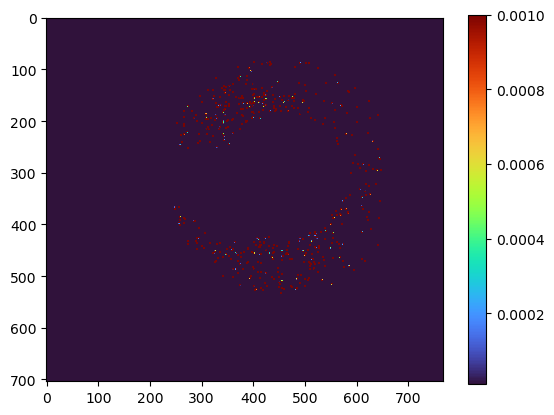

In [66]:
plt.figure()
plt.imshow(imgs_reconstruct, cmap='turbo', vmin=1e-5, vmax=1e-3)
plt.colorbar()

In [21]:
# np.save(f"../source/saxs_img_run{run_num}.npy", imgs_reconstruct)

## mask

# ROIS

In [12]:
npixel = np.shape(imgs_reconstruct)
center = (312,438) #(int(npixel[0]/2), int(npixel[0]/2))

roi = ring(radius=190, thickness=18, center_x=center[0], center_y=center[1])
# roi = roi*mask
roi[250:350,:] = 0
# plt.imshow(~roi, vmin=0, vmax=1)
# plt.colorbar()

plt.figure()
plt.imshow(mask)
# plt.imshow(imgs_reconstruct, cmap='turbo', origin='lower', vmin=4, vmax=9)
plt.imshow(imgs_reconstruct*~roi, cmap='turbo', origin='lower', vmin=4, vmax=9)
plt.colorbar()
plt.axvline(x=center[1], c='yellow')
plt.axhline(y=center[0], c='yellow')
plt.xlim(200,690)
plt.ylim(70,550)

NameError: name 'ring' is not defined

In [ ]:
plt.figure()
plt.imshow(roi)
# np.save("/sdf/home/m/mbin/xpp-23-xsvs/results/shared/roi", roi)

Nota: C-Order, 1 refers to the Y axis, 2 to the X axis 
Calibration done at Thu Nov  2 13:50:39 2023
poni_version: 2
Detector: Detector
Detector_config: {"pixel1": 4.9999999999999996e-05, "pixel2": 4.9999999999999996e-05, "max_shape": [704, 768]}
Distance: 4.3
Poni1: 0.015576293525063355
Poni2: 0.021931741870294254
Rot1: 0.0
Rot2: 0.0
Rot3: 0.0
Wavelength: 1.3050968256126343e-10


In [3]:
poni1 = 0.015576293525063355
poni2 = 0.021931741870294254
psize= 50e-6

print(poni1/psize)
print(poni2/psize)

311.5258705012671
438.6348374058851


In [40]:
import pyFAI

In [ ]:
# ai = pyFAI.load('../../../shared/poni/xppl1001021_Run0024_epix5_poni.poni')

In [13]:
# poni = np.load('../../../shared/poni/xppl1001021_Run0024_epix5_poni.poni',allow_pickle=True)
# poni